In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
df1 = pd.read_csv('q3dm1-path1.csv', header=None)
df2 = pd.read_csv('q3dm1-path2.csv', header=None)

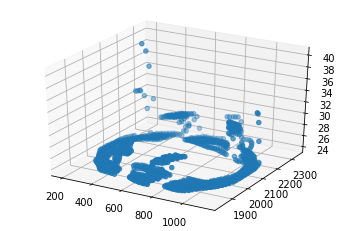

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x1_axis = np.array(df1[0])
y1_axis = np.array(df1[1])
z1_axis = np.array(df1[2])
ax.scatter3D(x1_axis, y1_axis, z1_axis, 'red');

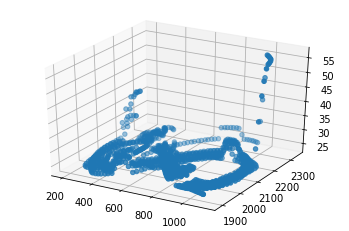

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x2_axis = np.array(df2[0])
y2_axis = np.array(df2[1])
z2_axis = np.array(df2[2])
ax.scatter3D(x2_axis, y2_axis, z2_axis, 'red');

In [5]:
def findDist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [6]:
def som(df, k, t):
    w = df.sample(k).reset_index(drop=True)
    weights = [0]*k
    for l in range(k):
        weights[l] = np.array(w.loc[l])
    dist = [0]*k
    for i in range(t):
        l_rate = 1 - (i/t)
        sigma = math.exp(-(i/t))
        x = np.array(df.loc[np.random.randint(0, len(df))])
        for j in range(k):
            dist[j] = findDist(x, weights[j])
        low_index = dist.index(min(dist))
        for p in range(k):
            weights[p] = weights[p] + l_rate*math.exp(-(findDist(weights[p], weights[low_index]))/sigma)*(x-weights[p])
    
    return weights

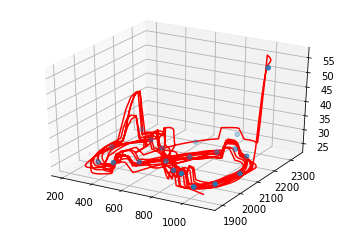

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x2_axis, y2_axis, z2_axis, 'red');

cluster = np.array(som(df2, 20, 10000))
x = cluster[:,0]
y = cluster[:,1]
z = cluster[:,2]
ax.scatter3D(x, y, z);

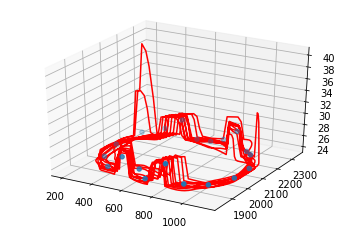

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x1_axis, y1_axis, z1_axis, 'red');

cluster = np.array(som(df1, 20, 10000))
x = cluster[:,0]
y = cluster[:,1]
z = cluster[:,2]
ax.scatter3D(x, y, z);